In [1]:
from pyagamo.players import ClonalSelection
from pyagamo import AGAMO
import time
import matplotlib.pyplot as plt
import Pyro4

In [2]:
max_eval = 10000
npop = 25
change_iter = 1
next_iter = -1
max_front = 100
player_parm = { "nclone": 15, "mutate_args": [0.45, 0.9, 0.01], 'sup': 0.0}

In [3]:
obj1 = Pyro4.Proxy('PYRO:obj_6a8948e30ab5418182fb4061d526b8df@localhost:49228')
obj2 = Pyro4.Proxy('PYRO:obj_f46c485dff6f468b939b29d859d218bc@localhost:49228')
obj1_m = Pyro4.Proxy('PYRO:obj_491a5899518e49d8857a3122706caf32@localhost:49228')
obj2_m = Pyro4.Proxy('PYRO:obj_45350d6084bd404f8c5ed7c15495c4ed@localhost:49228')
objs = [obj1, obj2]
objs_m = [obj1_m, obj2_m]

In [4]:
players = [ClonalSelection(i, npop, player_parm, transport='tcp') for i in range(2)]

In [5]:
agamo = AGAMO(max_eval, change_iter, next_iter, max_front, transport='tcp')
agamo.add_objectives(objs, objs_m)
agamo.add_players(players)
agamo.init()

In [6]:
agamo.start_optimize()
res=agamo.get_results()
agamo.close()

10006.0eval [00:11, 904.37eval/s]                         


In [7]:
res

{'stop_flag': True,
 'front': array([[1.        , 0.6       , 0.09198048],
        [1.26550187, 0.6       , 0.10548204],
        [1.07555572, 0.6       , 0.12083826],
        [1.        , 0.6       , 0.13932355],
        [1.        , 0.6       , 0.14549995],
        [1.        , 0.6       , 0.16550333],
        [1.        , 0.6       , 0.1841867 ],
        [1.        , 0.6       , 0.18940375],
        [1.        , 0.6       , 0.20478849],
        [1.        , 0.6       , 0.23261268],
        [1.        , 0.6       , 0.24173186],
        [1.        , 0.60540287, 0.24173186],
        [1.        , 0.60595423, 0.24173186],
        [1.        , 0.61779544, 0.24173186],
        [1.        , 0.6220517 , 0.24638208],
        [1.        , 0.62680104, 0.24173186],
        [1.        , 0.62882817, 0.24173186],
        [1.        , 0.69086495, 0.26481723],
        [1.        , 0.69300412, 0.25446676],
        [1.        , 0.69586024, 0.25446676],
        [1.        , 0.69702846, 0.26481723],
     

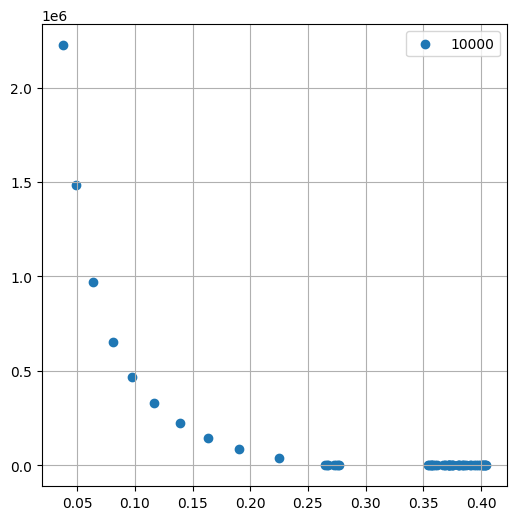

In [8]:
ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111)
front_eval = res['front_eval']
ax.scatter(front_eval[:, 0], front_eval[:, 1], marker='o', label=str(max_eval))
ax.grid(True)
plt.legend()
plt.show()

In [9]:
agamo = AGAMO(max_eval, change_iter, next_iter, max_front)
agamo.add_objectives(objs, objs_m)
agamo.add_players(players)
agamo.init()

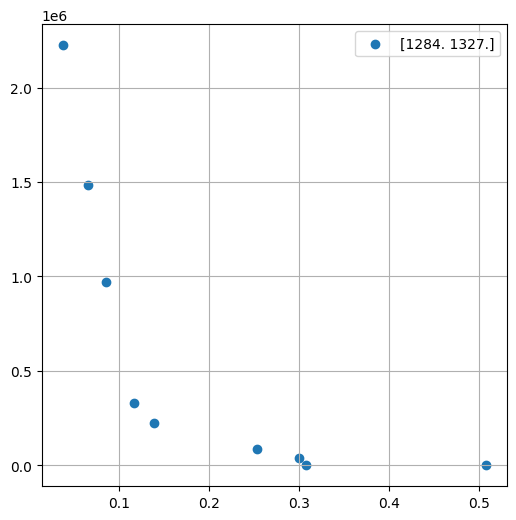

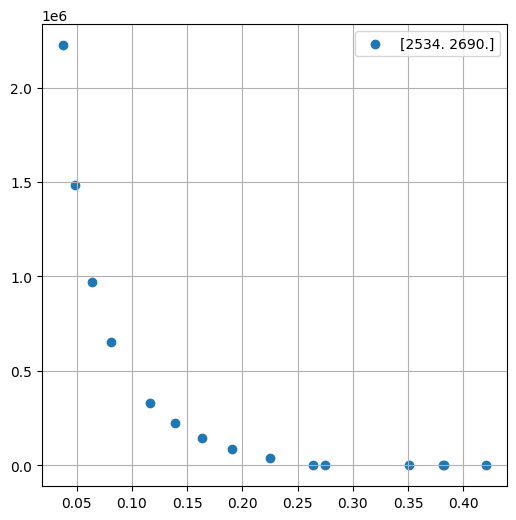

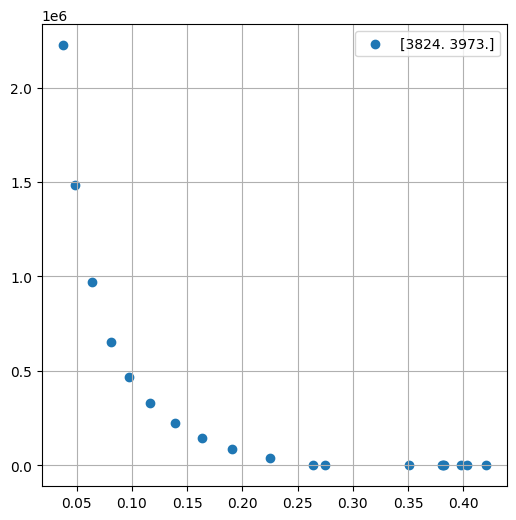

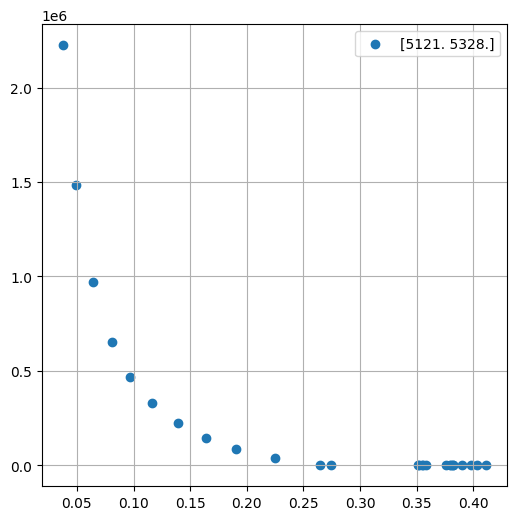

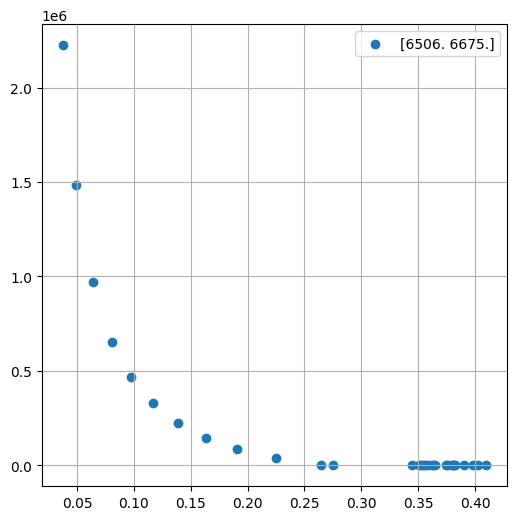

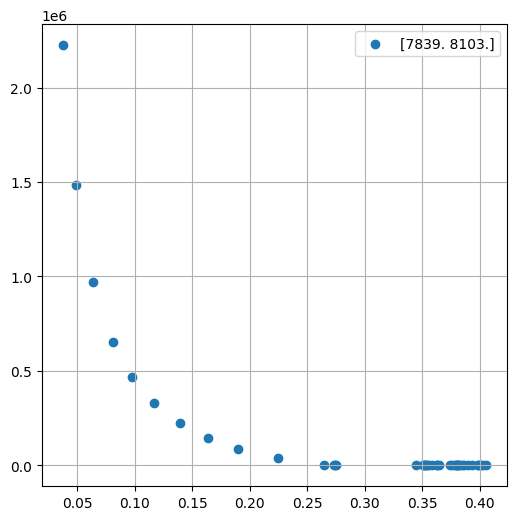

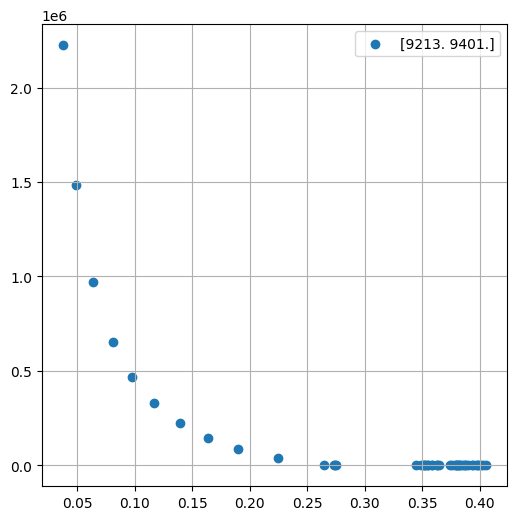

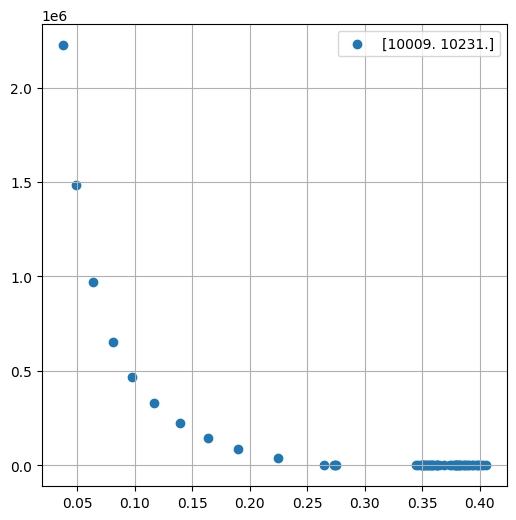

In [10]:
agamo.start_optimize(thread=True)
res=agamo.get_results()
while not res.get('stop_flag', False):
    res=agamo.get_results()
    front_eval = res.get('front_eval', None)
    if (front_eval is not None) and len(front_eval)>0:
        ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111)
        ax.grid(True)
        ax.scatter(front_eval[:, 0], front_eval[:, 1], marker='o', label=res['evaluations']+res['evaluations_m'])
        plt.legend()
        plt.show()
    time.sleep(1)
    #print(res.get('iterations', 'brak'))
agamo.close()

In [11]:
res

{'stop_flag': True,
 'front': array([[1.        , 0.6       , 0.09476413],
        [1.32210644, 0.6       , 0.11161621],
        [1.        , 0.6       , 0.12514871],
        [1.32210644, 0.6       , 0.13932873],
        [1.        , 0.6       , 0.14614492],
        [1.32210644, 0.6       , 0.16576005],
        [1.        , 0.6       , 0.17705458],
        [1.26279267, 0.6       , 0.18660408],
        [1.32210644, 0.6       , 0.20731119],
        [1.        , 0.6       , 0.22764457],
        [1.        , 0.6       , 0.25142141],
        [1.32210644, 0.62024653, 0.24552657],
        [1.        , 0.62223019, 0.25142141],
        [1.        , 0.6236228 , 0.25142141],
        [1.        , 0.67269413, 0.27117396],
        [1.08506058, 0.6762251 , 0.27117396],
        [1.        , 0.68232812, 0.27117396],
        [1.32210644, 0.68324129, 0.27117396],
        [1.        , 0.68345979, 0.27117396],
        [1.        , 0.68574403, 0.27117396],
        [1.        , 0.68644301, 0.27117396],
     